<a href="https://colab.research.google.com/github/rocket0l4/ML-files/blob/main/Bias_variance_for(Decision_tree_and_Random_Forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generating the data by use of make_circles.

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

#Train test split

In [3]:
np.random.seed(42)
X,y = make_circles(n_samples=500,factor = 0.1,noise = 0.35,random_state =42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [4]:
X.shape

(500, 2)

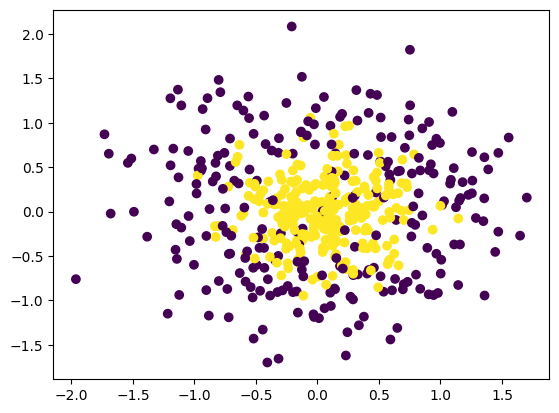

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

#It is a classification dataset, which means there are 2 classes present in the dataset.

#Using Decision tree Classifier

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

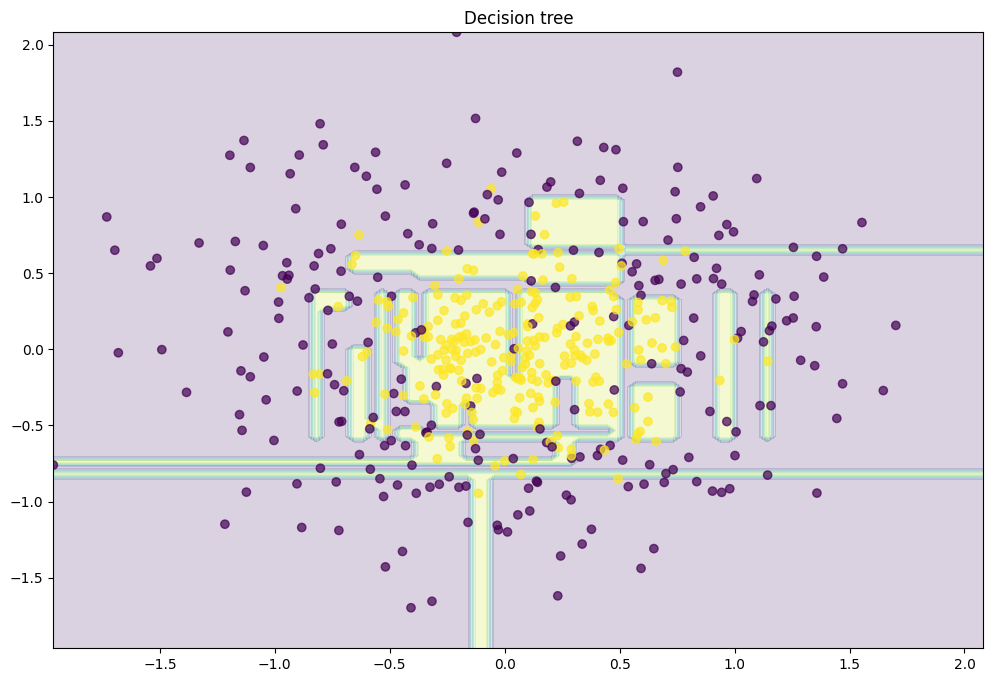

In [12]:
plt.figure(figsize=(12,8))
x_range = np.linspace(X.min(),X.max(),100)
xx1,xx2 = np.meshgrid(x_range,x_range)
y_hat = dtree.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1], c=y,cmap = 'viridis',alpha = 0.7)
plt.title("Decision tree")
plt.show()

#Using of Random Forest Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
rf = RandomForestClassifier(n_estimators=500,random_state = 42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

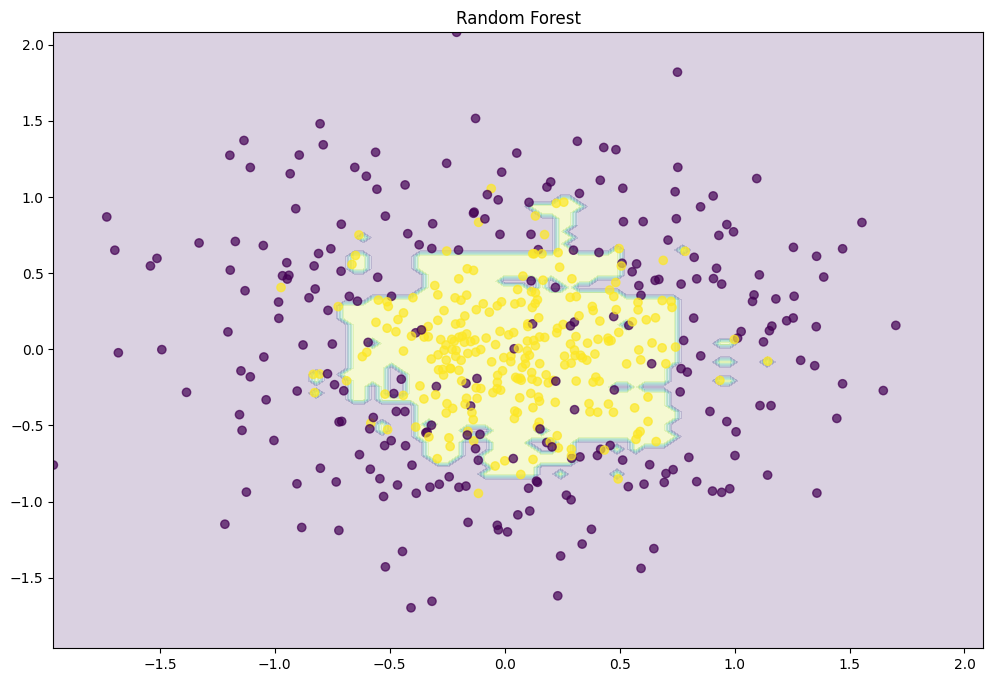

In [15]:
plt.figure(figsize=(12,8))
x_range = np.linspace(X.min(),X.max(),100)
xx1,xx2 = np.meshgrid(x_range,x_range)
y_hat = rf.predict(np.c_[xx1.ravel(),xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1,xx2,y_hat,alpha=0.2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',alpha=0.7)
plt.title('Random Forest')
plt.show()

#Generating the Dataset for the Regession problem...

In [18]:
n_train = 150
n_test = 1000
noise  = 0.1

#Generate data
def f(x):
  x = x.ravel()
  return np.exp(-x ** 2)+ 1.5 * np.exp(-(x-2) ** 2)

def generate(n_samples,noise):
  X = np.random.rand(n_samples) * 10 - 5
  X = np.sort(X).ravel()
  y = np.exp(-X ** 2) + 1.5 * np.exp(-(X-2)** 2)\
      + np.random.normal(0.0,noise,n_samples)
  X = X.reshape((n_samples, 1))

  return X,y

X_train,y_train = generate(n_samples=n_train,noise = noise)
X_test,y_test = generate(n_samples= n_test,noise=noise)


(-5.0, 5.0)

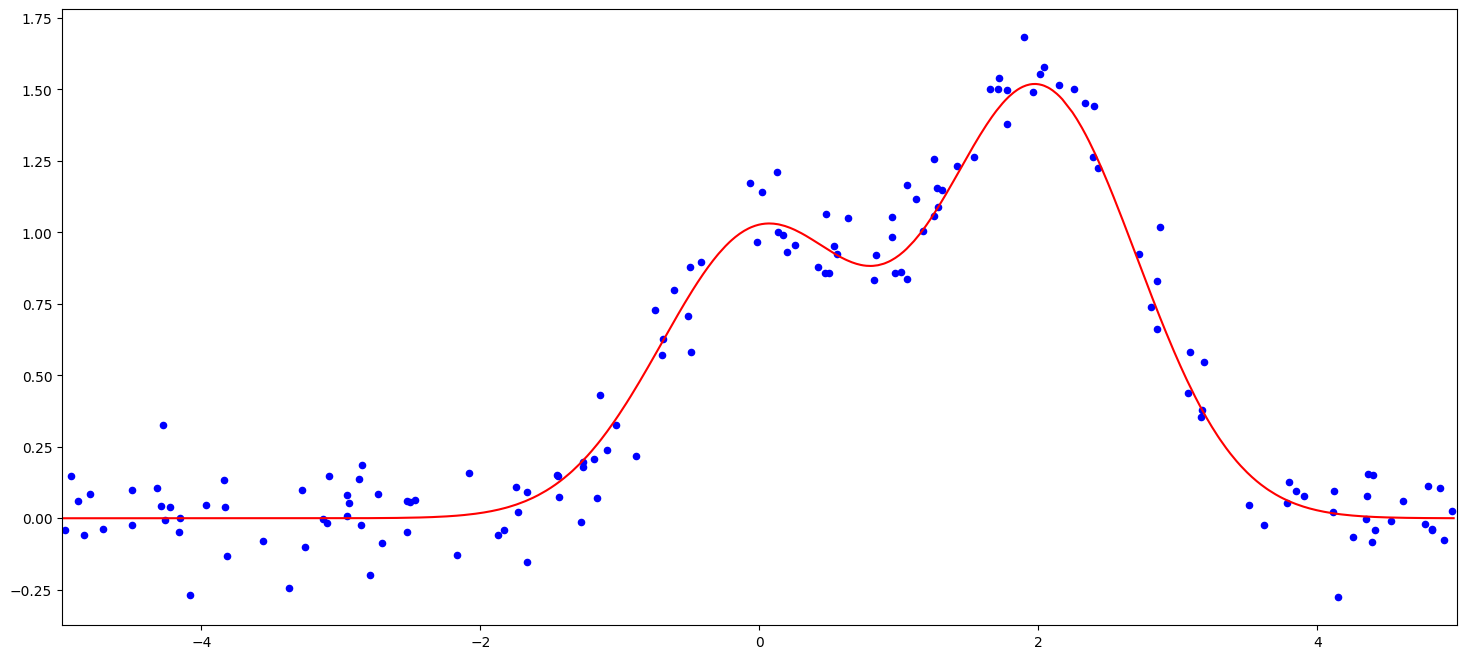

In [19]:
plt.figure(figsize=(18,8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,y_train,c="b",s =20)
plt.xlim([-5,5])

#there is only single input column, single output column are present....

#The red lines show the true pattern of the dataset set, and we generate the dataset the help of this red line, by usin random noise.


In [20]:
#Applying Decision tree Regressor
from sklearn.tree import DecisionTreeRegressor

Text(0.5, 1.0, 'Decision tree, MSE = 23.78')

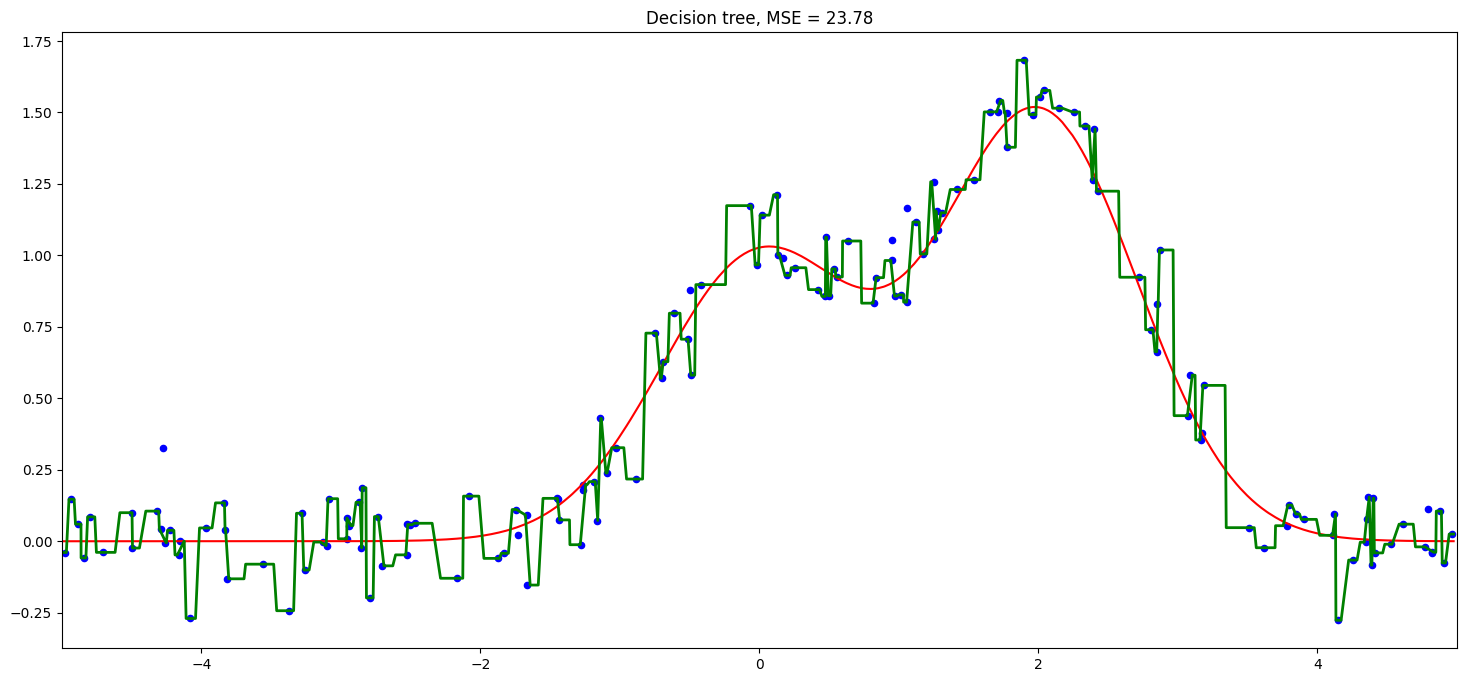

In [21]:
dtree = DecisionTreeRegressor().fit(X_train,y_train)
d_predict = dtree.predict(X_test)

plt.figure(figsize =(18,8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,y_train,c="b",s =20)
plt.plot(X_test,d_predict,"g",lw = 2)
plt.xlim([-5,5])
plt.title("Decision tree, MSE = %.2f"
          % np.sum((y_test - d_predict)**2))

#As we clearly see, our model tries to touch the every point or tries to touch the outliers presnt over the graph, Due to this,
- Our model tries the Overfitting, ie. tries to reduce the training error.
- tries to low bias and high variance, that means performance on test dataset will not be good.
- Also our model creates the grapah which is going far from the red line...

In [22]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [23]:
rfr = RandomForestRegressor(n_estimators=1000).fit(X_train,y_train)
rf_predict = rfr.predict(X_test)

Text(0.5, 1.0, 'Random Forest, MSE = 15.91')

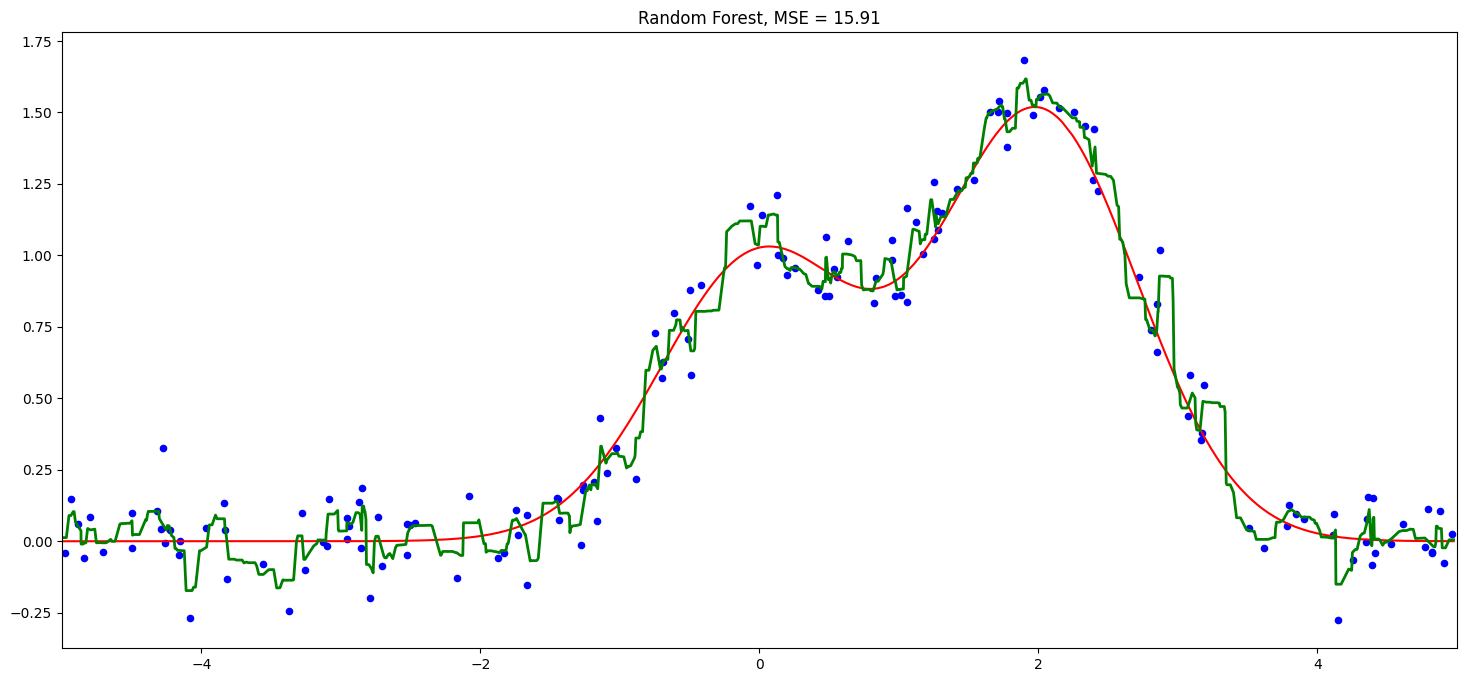

In [24]:
plt.figure(figsize=(18,8))
plt.plot(X_test,f(X_test),"r")
plt.scatter(X_train,y_train,c='b',s =20)
plt.plot(X_test,rf_predict,"g",lw=2)
plt.xlim([-5,5])
plt.title("Random Forest, MSE = %.2f"%np.sum((y_test - rf_predict)**2))

# here we can see clearly it performs batter as compare to the Decison tree...

# Here it do not try to touch the extream points, it tries to stay close to the red line,

- Due to this the if we comapre the MSE of boths the Random Forest give better results